In [ ]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import torch

In [ ]:
# os.chdir("/content/drive/MyDrive/Colab Notebooks/ToxicBias")

In [ ]:
Train = pd.read_csv("Train.csv", usecols = ['text', 'bias', 'race', 'religion', 'lgbtq', 'gender', 'political'], index_col = False)
Test = pd.read_csv("Test.csv", usecols = ['text', 'bias', 'race', 'religion', 'lgbtq', 'gender', 'political'], index_col = False)
Val = pd.read_csv("Val.csv", usecols = ['text', 'bias', 'race', 'religion', 'lgbtq', 'gender', 'political'], index_col = False)


In [ ]:
data = pd.concat([Train, Test, Val])

In [ ]:
data.shape

(10412, 7)

In [ ]:
# def modifyDF(df):
  # newCol = ['race', 'gender', 'religion', 'lgbtq', 'political']
  # for col in newCol:
  #   df[col] = df.iloc[:, 2].apply(lambda x: 1 if col in x else 0)
data['bias'] = data['bias'].apply(lambda x: 0 if x==1 else 1)
data.rename(columns = {'bias': 'non_bias', 'text':'comment_text'}, inplace = True)


In [ ]:
# modifyDF(data)
# modifyDF(Test)
# modifyDF(Val)

In [ ]:
# data

In [ ]:
Total_of_Class = {}                   # Total labeled comments from each class
for col in data.iloc[:,1:].columns:
    Total_of_Class[col] = data[col].value_counts()[1]
    print(f"{col} : {Total_of_Class[col]}\n")

non_bias : 6087

race : 2202

religion : 1573

gender : 358

lgbtq : 576

political : 218



In [ ]:
# creating new column named "total_classes" which will show total no. of classes comment belongs to

data["total_classes"] = data.iloc[:,1:6].apply(lambda x: sum(x), axis=1)    # if we take sum of all labels we can tell how many classes comment belong to
data                                                                        # for ex. if comment belongs to "race" and "gender" then the sum will be 2

,comment_text,non_bias,race,religion,gender,lgbtq,political,total_classes
0,We are still having their water put at risk in...,0,1,0,1,0,0,2
1,This whole tragedy is the face and body and ph...,0,0,1,0,0,0,1
2,Black on black killings. Stop this madness ma...,0,1,0,0,0,0,1
3,The world would be at peace with out islam.,0,0,1,0,0,0,1
4,Another Muslim commits a terrorist act and dem...,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
827,"According to evolutionary theory, all human be...",1,0,0,0,0,0,1
828,There are certainly some dangerous people with...,1,0,0,0,0,0,1
829,The Muslims have been part of this country sin...,1,0,0,0,0,0,1
830,Muslims live in many countries all over the wo...,1,0,0,0,0,0,1


In [ ]:
multi_label_total = {}
for value in data["total_classes"].unique():
    multi_label_total[value] = data["total_classes"].value_counts()[value]
multi_label_total

{2: 434, 1: 9829, 0: 116, 3: 33}

In [ ]:
# copying our dataset in new variable for further text preprocessing
new_data = data.copy()

In [ ]:
import re

In [ ]:
# creating copy of data for data cleaning and preprocessing
cleaned_data = new_data.copy()

# Removing Hyperlinks from text

cleaned_data["comment_text"] = cleaned_data["comment_text"].map(lambda x: re.sub(r"https?://\S+|www\.\S+","",x) )

print(data.loc[629,"comment_text"],"\n\n")
print("++++ After Removing URLs ++++\n\n ")
print(cleaned_data.loc[629,"comment_text"])

629    the real victims are the women. Yes because th...
629    You leftist rag doesnt deserve this good of a ...
629    There is no point in insulting someone for bei...
Name: comment_text, dtype: object 


++++ After Removing URLs ++++

 
629    the real victims are the women. Yes because th...
629    You leftist rag doesnt deserve this good of a ...
629    There is no point in insulting someone for bei...
Name: comment_text, dtype: object


In [ ]:
# Rmoving emojis from text
cleaned_data["comment_text"] = cleaned_data["comment_text"].map(lambda x: re.sub("["
                                                                                   u"\U0001F600-\U0001F64F"
                                                                                   u"\U0001F300-\U0001F5FF"
                                                                                   u"\U0001F680-\U0001F6FF"
                                                                                   u"\U0001F1E0-\U0001F1FF"
                                                                                   u"\U00002702-\U000027B0"
                                                                                   u"\U000024C2-\U0001F251"
                                                                                   "]+","", x, flags=re.UNICODE))

print(data.loc[728,"comment_text"],"\n\n")
print("++++ After Removing Emojis ++++\n\n ")
print(cleaned_data.loc[728,"comment_text"])

728    LMAO Im sure christian nutjobs praying in isla...
728    Islam is a religion of equality and human righ...
728    The fact that a person may be disabled does no...
Name: comment_text, dtype: object 


++++ After Removing Emojis ++++

 
728    LMAO Im sure christian nutjobs praying in isla...
728    Islam is a religion of equality and human righ...
728    The fact that a person may be disabled does no...
Name: comment_text, dtype: object


In [ ]:
# Removing IP addresses from text
cleaned_data["comment_text"] = cleaned_data["comment_text"].map(lambda x: re.sub(r"\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}","",x))

print(data.loc[744,"comment_text"],"\n\n")
print("++++ After Removing IP addresses ++++\n\n ")
print(cleaned_data.loc[744,"comment_text"])

744    Cubans have less class than Mexicans which mea...
744    What? Who said that? Don't tell me "Someone sa...
744    The majority of Gypsy workers are proud and ha...
Name: comment_text, dtype: object 


++++ After Removing IP addresses ++++

 
744    Cubans have less class than Mexicans which mea...
744    What? Who said that? Don't tell me "Someone sa...
744    The majority of Gypsy workers are proud and ha...
Name: comment_text, dtype: object


In [ ]:
# # matches of css style,class elements and attributes
# idxs_css = []
# for i in  range(len(cleaned_data)):
#     if re.findall(r"[{][|].+\n",cleaned_data.loc[i,"comment_text"]):
#         idxs_css.append(i)
# print(f"length of css style elements containing comments : {len(idxs_css)}")

# # Comments Containing Css style, class and attributes
# ct=0
# for i in idxs_css:
#     ct += 1
#     if ct>5:
#         break
#     st = cleaned_data.loc[i,"comment_text"]
#     print(f"Comment No.{i} :\n\n{st}")
#     print("---------------------------------------------------------------------------------------------------------------\n\n")

In [ ]:
# cleaned_data.loc[idxs_css,"total_classes"].value_counts()    # total css style labeled comments

In [ ]:
# Removing html tags from text
cleaned_data["comment_text"] = cleaned_data["comment_text"].map(lambda x: re.sub(r"<.*?>","",x))

In [ ]:
# There are some comments which contain double quoted words like --> ""words""  we will convert these to --> "words"

cleaned_data["comment_text"] = cleaned_data["comment_text"].map(lambda x: re.sub(r"\"\"", "\"",x))   # replacing "" with "
cleaned_data["comment_text"] = cleaned_data["comment_text"].map(lambda x: re.sub(r"^\"", "",x))      # removing quotation from start and the end of the string
cleaned_data["comment_text"] = cleaned_data["comment_text"].map(lambda x: re.sub(r"\"$", "",x))

print(data.loc[15,"comment_text"],"\n\n")
print("++++ After Removing double quotation ++++\n\n ")
print(cleaned_data.loc[15,"comment_text"])

15    PROGRESSIVES are a CLEAR and PRESENT DANGER to...
15    Actually its a genderneutral practice.   Same ...
15    A recruit dies after falling off a building be...
Name: comment_text, dtype: object 


++++ After Removing double quotation ++++

 
15    PROGRESSIVES are a CLEAR and PRESENT DANGER to...
15    Actually its a genderneutral practice.   Same ...
15    A recruit dies after falling off a building be...
Name: comment_text, dtype: object


In [ ]:
# Removing Punctuation / Special characters (;:'".?@!%&*+) which appears more than twice in the text

cleaned_data["comment_text"] = cleaned_data["comment_text"].map(lambda x: re.sub(r"[^a-zA-Z0-9\s][^a-zA-Z0-9\s]+", " ",x))

print(data.loc[1871,"comment_text"],"\n\n")
print("++++ After Removing consequent special chars ++++\n\n ")
print(cleaned_data.loc[1871,"comment_text"])

Im not gay  or black or of a religious minority or any other identifiable target group. But I do think that the union is trying to stir up trouble. 


++++ After Removing consequent special chars ++++

 
Im not gay  or black or of a religious minority or any other identifiable target group. But I do think that the union is trying to stir up trouble.


In [ ]:
# Removing Special characters

cleaned_data["comment_text"] = cleaned_data["comment_text"].map(lambda x: re.sub(r"[^a-zA-Z0-9\s\"\',:;?!.()]", " ",x))

print(data.loc[126,"comment_text"],"\n\n")
print("++++ After Removing special chars ++++\n\n ")
print(cleaned_data.loc[126,"comment_text"])

126         Ban Muslim refugees and  I will vote for you
126    Do Black Lives Matter when the killer is black...
126    How is the Proud Boys belief that western whit...
Name: comment_text, dtype: object 


++++ After Removing special chars ++++

 
126         Ban Muslim refugees and  I will vote for you
126    Do Black Lives Matter when the killer is black...
126    How is the Proud Boys belief that western whit...
Name: comment_text, dtype: object


In [ ]:
# Removing extra spaces in text

cleaned_data["comment_text"] = cleaned_data["comment_text"].map(lambda x: re.sub(r"\s\s+", " ",x))
print(cleaned_data.loc[126,"comment_text"])

126          Ban Muslim refugees and I will vote for you
126    Do Black Lives Matter when the killer is black...
126    How is the Proud Boys belief that western whit...
Name: comment_text, dtype: object


In [ ]:
cleaned_data.reset_index(inplace=True)
cleaned_data.drop(columns=["index"], inplace=True)
Final_data = cleaned_data.copy()

In [ ]:
from transformers import DistilBertTokenizer
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

# Using Pretrained DistilBertTokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Creating Dataset class for Toxic comments and Labels
class Toxic_Dataset(Dataset):
    def __init__(self, Comments_, Labels_):
        self.comments = Comments_.copy()
        self.labels = Labels_.copy()

        self.comments["comment_text"] = self.comments["comment_text"].map(lambda x: tokenizer(x, padding="max_length", truncation=True, return_tensors="pt", max_length = 512))

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        comment = self.comments.loc[idx,"comment_text"]
        label = np.array(self.labels.loc[idx,:])

        return comment, label

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_rest, X_test, Y_rest, Y_test = train_test_split(Final_data.iloc[:,0],Final_data.iloc[:,1:], test_size=0.1, stratify=Final_data.iloc[:,7])
X_train, X_val, Y_train, Y_val = train_test_split(X_rest,Y_rest, test_size=0.1, stratify=Y_rest.iloc[:,-1])

Y_test.drop(columns=["non_bias","total_classes"], inplace=True)
Y_train.drop(columns=["non_bias","total_classes"], inplace=True)
Y_val.drop(columns=["non_bias","total_classes"], inplace=True)

In [ ]:
X_train = X_train.reset_index()
X_train.drop(columns=["index"], inplace=True)
Y_train = Y_train.reset_index()
Y_train.drop(columns=["index"], inplace=True)
X_test = X_test.reset_index()
X_test.drop(columns=["index"], inplace=True)
Y_test = Y_test.reset_index()
Y_test.drop(columns=["index"], inplace=True)
X_val = X_val.reset_index()
X_val.drop(columns=["index"], inplace=True)
Y_val = Y_val.reset_index()
Y_val.drop(columns=["index"], inplace=True)

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_val.shape, Y_val.shape

((8433, 1), (8433, 5), (1042, 1), (1042, 5), (937, 1), (937, 5))

In [ ]:
# Making Training, Testing and Validation of data using Dataset class
Train_data = Toxic_Dataset(X_train, Y_train)
Test_data = Toxic_Dataset(X_test, Y_test)
Val_data = Toxic_Dataset(X_val, Y_val)

# Making datasets into batches
Train_Loader = DataLoader(Train_data, batch_size=32, shuffle=True)
Test_Loader = DataLoader(Test_data, shuffle=True)        #batch_size=16,
Val_Loader = DataLoader(Val_data, shuffle=True)          #batch_size=16,

In [ ]:
# DistilBERT

from transformers import DistilBertForSequenceClassification

Distil_bert = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

Distil_bert.classifier = nn.Sequential(
                    nn.Linear(768,5),
                    nn.Sigmoid()
                  )
# print(Distil_bert)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.optim import Adam
from tqdm import tqdm
from torch.nn import BCELoss
from torch.optim.lr_scheduler import StepLR

def train_Model(model,Train_DL, Val_DL, learning_rate, epochs):

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    Loss = BCELoss()
    Optimizer = Adam(params=model.parameters(), lr=learning_rate)
    scheduler = StepLR(Optimizer, step_size=212, gamma=0.1)

    model.to(device)
    model.train()

    train_acc_epochs = []
    train_loss_epochs = []
    val_acc_epochs = []
    val_loss_epochs = []

    for epoch in range(epochs):
        training_loss = {}
        training_accuracy = {}
        validation_loss = {}
        validation_accuracy = {}
        batch = 0

        for comments, labels in tqdm(Train_DL):

            labels = labels.to(device)
            labels = labels.float()
            masks = comments["attention_mask"].squeeze(1).to(device)
            input_ids = comments["input_ids"].squeeze(1).to(device)

            output = model(input_ids, masks)
            loss = Loss(output.logits, labels)

            Optimizer.zero_grad()
            loss.backward()
            Optimizer.step()
            scheduler.step()


            batch += 1
            if batch%64 == 0:
                with torch.no_grad():
                    acc = []
                    op = output.logits
                    for lb in range(len(labels)):
                        correct = 0
                        for i in range(len(labels[lb])):
                            res = 1 if op[lb,i]>0.5 else 0
                            if res == labels[lb,i]:
                                correct += 1
                        acc.append(correct/len(labels[lb]))

                    training_loss[batch] = loss.item()
                    training_accuracy[batch] = sum(acc)/len(acc)
                    print(f"Epoch:{epoch+1} | batch no:{batch}/{len(Train_DL)} | Loss:{loss.item():.4f} | Accuracy:{sum(acc)/len(acc):.4f}")

                    # Testing model on validation Data
                    accVal = []
                    val_loss = 0
                    for comments, labels in Val_DL:
                        labels = labels.to(device)
                        labels = labels.float()
                        masks = comments["attention_mask"].squeeze(1).to(device)
                        input_ids = comments["input_ids"].squeeze(1).to(device)

                        output = model(input_ids, masks)
                        loss = Loss(output.logits, labels)
                        val_loss += loss.item()

                        op = output.logits
                        correct_val = 0
                        for i in range(5):
                            res = 1 if op[0,i]>0.5 else 0
                            if res == labels[0,i]:
                                correct_val += 1
                        accVal.append(correct_val/5)

                    validation_loss[batch] = val_loss/len(Val_DL)
                    validation_accuracy[batch] = sum(accVal)/len(accVal)
                    print(f" Validation Loss:{val_loss/len(Val_DL):.4f} | Validation Accuracy:{sum(accVal)/len(accVal):.4f}")

        train_acc_epochs.append(training_accuracy)
        train_loss_epochs.append(training_loss)
        val_acc_epochs.append(validation_accuracy)
        val_loss_epochs.append(validation_loss)

    return train_acc_epochs, train_loss_epochs, val_acc_epochs, val_loss_epochs

In [ ]:
# Training Model
TA, TL, VA, VL = train_Model(Distil_bert, Train_Loader, Val_Loader, learning_rate=0.00002, epochs=2)

 20%|█▉        | 52/264 [01:10<04:49,  1.36s/it]

Epoch:1 | batch no:53/264 | Loss:0.0733 | Accuracy:0.9750


 20%|██        | 53/264 [01:30<23:58,  6.82s/it]

 Validation Loss:0.1119 | Validation Accuracy:0.9565


 40%|███▉      | 105/264 [02:41<03:38,  1.38s/it]

Epoch:1 | batch no:106/264 | Loss:0.1415 | Accuracy:0.9563


 40%|████      | 106/264 [03:02<19:15,  7.31s/it]

 Validation Loss:0.1119 | Validation Accuracy:0.9573


 60%|█████▉    | 158/264 [04:12<02:26,  1.38s/it]

Epoch:1 | batch no:159/264 | Loss:0.0774 | Accuracy:0.9688


 60%|██████    | 159/264 [04:32<12:03,  6.89s/it]

 Validation Loss:0.1148 | Validation Accuracy:0.9556


 80%|███████▉  | 211/264 [05:42<01:13,  1.38s/it]

Epoch:1 | batch no:212/264 | Loss:0.1198 | Accuracy:0.9688


 80%|████████  | 212/264 [06:02<05:57,  6.88s/it]

 Validation Loss:0.1139 | Validation Accuracy:0.9560


 20%|█▉        | 52/264 [01:10<04:51,  1.38s/it]

Epoch:2 | batch no:53/264 | Loss:0.1311 | Accuracy:0.9438


 20%|██        | 53/264 [01:30<24:11,  6.88s/it]

 Validation Loss:0.1140 | Validation Accuracy:0.9562


 40%|███▉      | 105/264 [02:41<03:39,  1.38s/it]

Epoch:2 | batch no:106/264 | Loss:0.1199 | Accuracy:0.9438


 40%|████      | 106/264 [03:00<18:08,  6.89s/it]

 Validation Loss:0.1136 | Validation Accuracy:0.9560


 60%|█████▉    | 158/264 [04:11<02:26,  1.38s/it]

Epoch:2 | batch no:159/264 | Loss:0.0890 | Accuracy:0.9688


 60%|██████    | 159/264 [04:30<12:01,  6.87s/it]

 Validation Loss:0.1142 | Validation Accuracy:0.9560


 80%|███████▉  | 211/264 [05:41<01:13,  1.38s/it]

Epoch:2 | batch no:212/264 | Loss:0.0689 | Accuracy:0.9750


 80%|████████  | 212/264 [06:00<05:58,  6.89s/it]

 Validation Loss:0.1137 | Validation Accuracy:0.9552


100%|██████████| 264/264 [07:11<00:00,  1.63s/it]


In [ ]:
# Evaluating model on Test data
TrueP = [0]*6
FalseP = [0]*6
TrueN = [0]*6
FalseN = [0]*6
def Evaluate_Model(model,Test_DL):

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    Loss = BCELoss()
    model.to(device)
    model.eval()

    accTest = []
    Test_loss = 0

    for comments, labels in Test_DL:
        labels = labels.to(device)
        labels = labels.float()
        masks = comments["attention_mask"].squeeze(1).to(device)
        input_ids = comments["input_ids"].squeeze(1).to(device)

        output = model(input_ids, masks)
        loss = Loss(output.logits, labels)
        Test_loss += loss.item()

        op = output.logits
        correct_val = 0
        pred_bias = orig_bias = 0
        for i in range(5):
            res = 1 if op[0,i]>0.5 else 0
            if(res == 1):
              pred_bias = 1
            if(labels[0, i] == 1):
              orig_bias = 1
            if res == labels[0,i]:
                correct_val += 1
            if res == 1 and labels[0,i] == 1:
              TrueP[i]+=1
            elif res == 1 and labels[0,i] == 0:
              FalseP[i]+=1
            elif res == 0 and labels[0,i] == 1:
              FalseN[i]+=1
            else:
              TrueN[i]+=1
        accTest.append(correct_val/5)
        if (pred_bias == 1) and (orig_bias == 1):
          TrueP[5]+=1
        elif (pred_bias == 1) and (orig_bias == 0):
          FalseP[5]+=1
        elif pred_bias == 0 and orig_bias == 1:
          FalseN[5]+=1
        else:
          TrueN[5]+=1

    print("Testing Dataset:\n")
    print(f" Test Loss:{Test_loss/len(Test_DL):.4f} | Test Accuracy:{sum(accTest)/len(accTest):.4f}")

Evaluate_Model(Distil_bert, Test_Loader)

Testing Dataset:

 Test Loss:0.1151 | Test Accuracy:0.9582


In [ ]:
def generateReport(index):
  print(f'True Positive: {TrueP[index]} | True Negative: {TrueN[index]} | False Positive: {FalseP[index]} | False Negative: {FalseN[index]}')
  if(TrueP[index]+FalseP[index] == 0):
    precision = 1
  else:
    precision = TrueP[index]/(TrueP[index]+FalseP[index])
  if(TrueP[index]+FalseN[index] == 0):
    recall = 1
  else:
    recall = TrueP[index]/(TrueP[index]+FalseN[index])
  f1 = (2*precision*recall)/(precision+recall)
  accuracy = (TrueP[index]+TrueN[index])/(TrueP[index]+TrueN[index]+FalseP[index]+FalseN[index])
  print(f'Precision: {precision:.4f} | recall: {recall:.4f} | f1: {f1:.4f} | accuracy: {accuracy:.4f}')

In [ ]:
print("Bias")
generateReport(5)

print("\n\nRace")
generateReport(0)

print("\n\nGender")
generateReport(1)

print("\n\nReligion")
generateReport(2)

print("\n\nLGBTQ")
generateReport(3)

print("\n\nPolitical")
generateReport(4)


Bias
True Positive: 404 | True Negative: 506 | False Positive: 101 | False Negative: 31
Precision: 0.8000 | recall: 0.9287 | f1: 0.8596 | accuracy: 0.8733


Race
True Positive: 220 | True Negative: 746 | False Positive: 65 | False Negative: 11
Precision: 0.7719 | recall: 0.9524 | f1: 0.8527 | accuracy: 0.9271


Gender
True Positive: 140 | True Negative: 840 | False Positive: 47 | False Negative: 15
Precision: 0.7487 | recall: 0.9032 | f1: 0.8187 | accuracy: 0.9405


Religion
True Positive: 1 | True Negative: 1009 | False Positive: 0 | False Negative: 32
Precision: 1.0000 | recall: 0.0303 | f1: 0.0588 | accuracy: 0.9693


LGBTQ
True Positive: 41 | True Negative: 973 | False Positive: 15 | False Negative: 13
Precision: 0.7321 | recall: 0.7593 | f1: 0.7455 | accuracy: 0.9731


Political
True Positive: 0 | True Negative: 1022 | False Positive: 0 | False Negative: 20
Precision: 1.0000 | recall: 0.0000 | f1: 0.0000 | accuracy: 0.9808


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# import matlplotlib.pyplot as plt

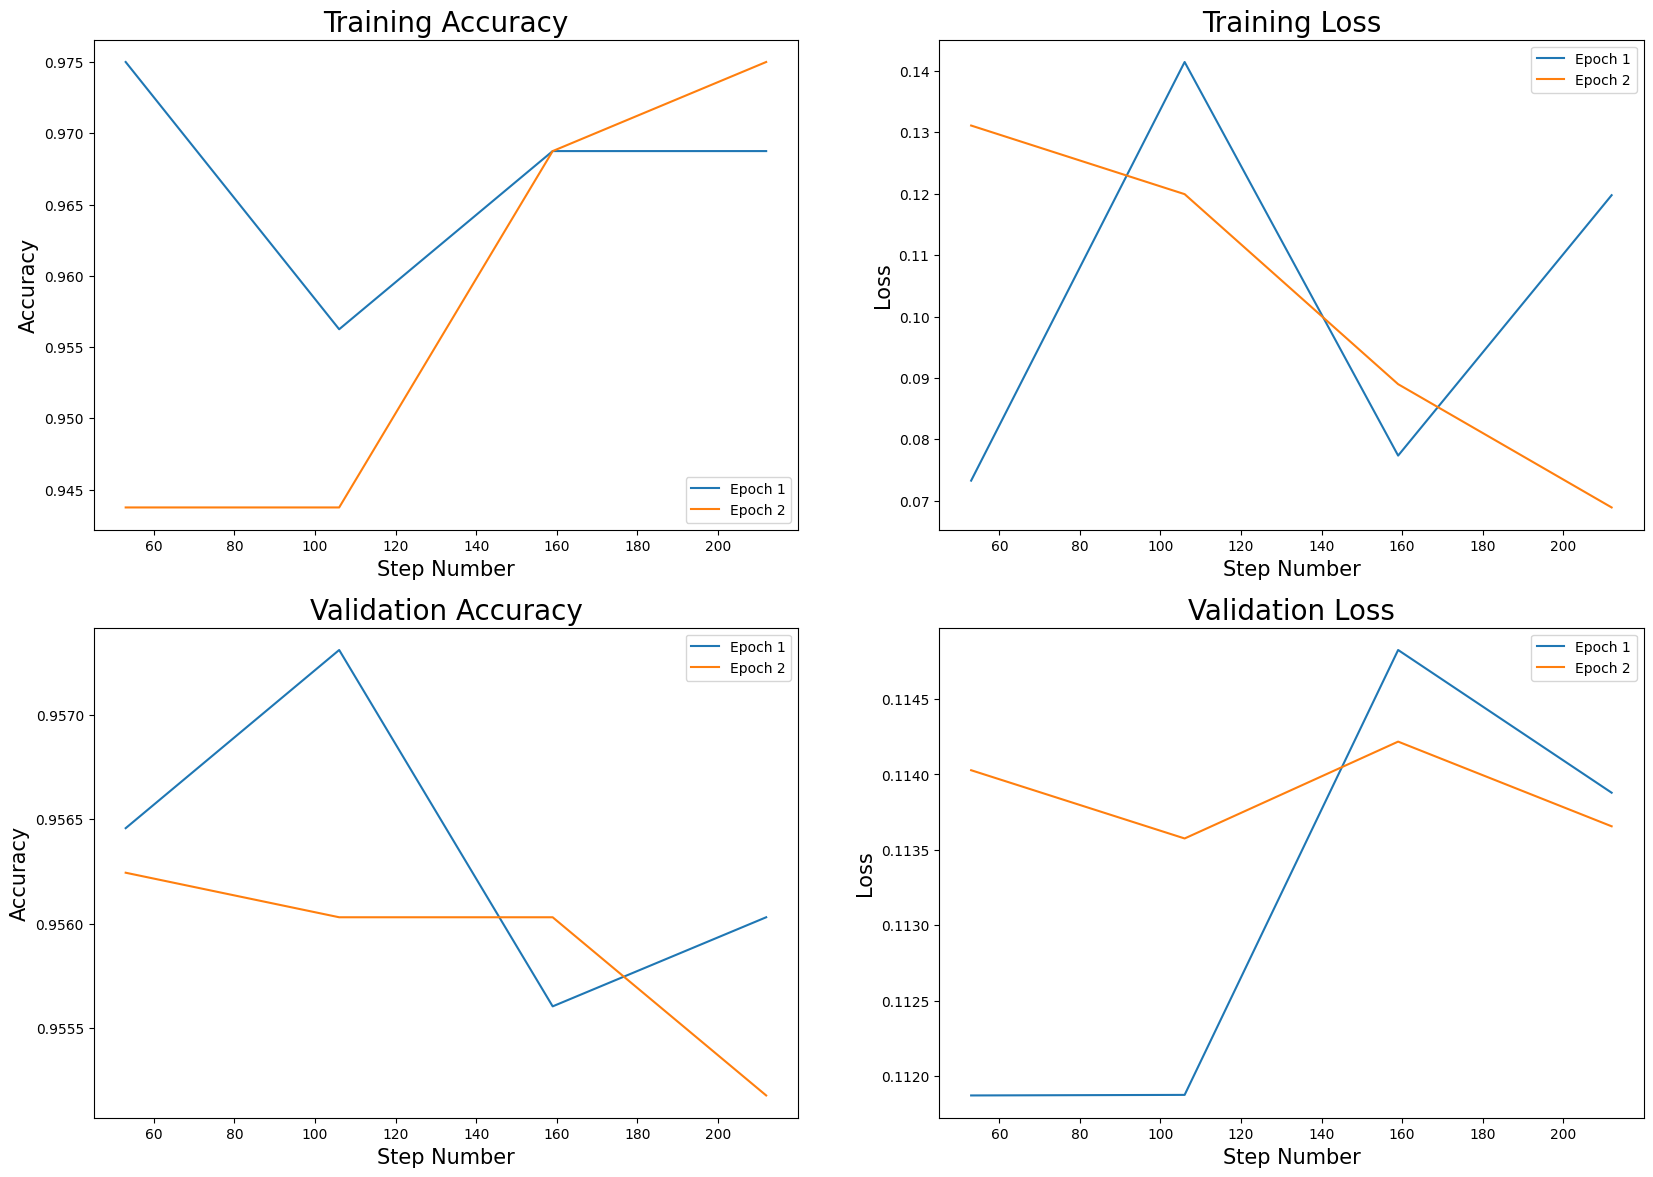

In [ ]:
def Acc_Loss_Plot(TA1, TA2, TL1, TL2, VA1, VA2, VL1, VL2):
    plt.figure(figsize=(20,14))
    Ac = plt.subplot(2,2,1)
    plt.plot(TA1.keys(), TA1.values())
    plt.plot(TA2.keys(), TA2.values())
    Ac.set_xlabel("Step Number", fontsize=15)
    Ac.set_ylabel("Accuracy", fontsize=15)
    Ac.set_title("Training Accuracy", fontsize=20)
    Ac.legend(["Epoch 1","Epoch 2"])

    Ls = plt.subplot(2,2,2)
    plt.plot(TL1.keys(), TL1.values())
    plt.plot(TL2.keys(), TL2.values())
    Ls.set_xlabel("Step Number", fontsize=15)
    Ls.set_ylabel("Loss", fontsize=15)
    Ls.set_title("Training Loss", fontsize=20)
    Ls.legend(["Epoch 1","Epoch 2"])

    VAc = plt.subplot(2,2,3)
    plt.plot(VA1.keys(), VA1.values())
    plt.plot(VA2.keys(), VA2.values())
    VAc.set_xlabel("Step Number", fontsize=15)
    VAc.set_ylabel("Accuracy", fontsize=15)
    VAc.set_title("Validation Accuracy", fontsize=20)
    VAc.legend(["Epoch 1","Epoch 2"])

    VLs = plt.subplot(2,2,4)
    plt.plot(VL1.keys(), VL1.values())
    plt.plot(VL2.keys(), VL2.values())
    VLs.set_xlabel("Step Number", fontsize=15)
    VLs.set_ylabel("Loss", fontsize=15)
    VLs.set_title("Validation Loss", fontsize=20)
    VLs.legend(["Epoch 1","Epoch 2"])

Acc_Loss_Plot(TA[0], TA[1], TL[0], TL[1], VA[0], VA[1], VL[0], VL[1])

In [ ]:
# Saving model

torch.save(Distil_bert,"/content/dsbert_toxic_aug.pt")